# Libraries and Variables

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy import stats
print("Libraries Imported")
#Lets import and check the dataset
#Attaching google drive
from google.colab import drive
drive.mount('/content/gdrive')

Libraries Imported
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
base_loc = '/content/gdrive/My Drive/upgrad/research/data/'
data_loc = base_loc + 'data.csv'
cluster2_loc = base_loc + 'cluster2.csv'
cluster7_loc = base_loc + 'cluster7.csv'

#Variables set
gameplay_loc = base_loc + 'games_1_data.csv'
achievement_loc = base_loc + 'Achievement_Percentages.csv'
app_id_loc = base_loc + 'App_ID_Info.csv'
group_strength_loc = base_loc + 'Groups.csv'
groups_data = base_loc + 'Groups_2013_1.csv'
player_summary_loc = base_loc + 'Player_Summaries_2013_1.csv'
friends_data = base_loc + 'Friends_2013_1.csv'
genres_loc = base_loc + 'Games_Genres.csv'
player_dataset_loc = base_loc + 'player_dataset.csv'
grouped_data_loc = base_loc + 'grouped_data.csv'
app_id_merge_loc = base_loc + 'app_id_merge.csv'

# Data Load and Prep

In [0]:
data = pd.read_csv(cluster2_loc)
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,0
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,0
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,1
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [0]:
data.ClusterID = data.ClusterID.apply(lambda x: 2 if x==0 else 1)

In [0]:
#Counts
data[['steamid','ClusterID']].groupby(by='ClusterID').count()

#38k - 1 vs 22k - 2

,steamid
ClusterID,
1,38166
2,22192


In [0]:
cluster_means = pd.DataFrame()

for columns in data.drop(['steamid'],axis=1).columns[:len(data.columns)-2]:
  a = pd.DataFrame(data.groupby(["ClusterID"])[columns].mean())
  cluster_means = pd.concat([cluster_means,a],axis=1)

cluster_means.reset_index(level=0, inplace=True)
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,1,0.0,0.461589,6808.314416,113027.445940,40.099434,2.262275,566.441844,80.088563,4.488440,19.540769,0.332482,11.585600,3732.864753,4.691964,324.657841,14.524801,3.943484e+05,34.789813,2557.660090,135.095556,1283.870395,0.423530,0.076687,0.017535,0.000313,0.035797,0.091750,0.003474,0.092317,0.005973,0.043761,0.004813,0.140782,0.06327,0.330164,0.038417,0.005098,0.000246,0.134284,0.081156,0.010919,0.121479,0.002746,0.001251,0.003101,0.228033,0.043105,0.377764,0.041416,0.004808,0.000139,0.135214,0.070395,0.007928,0.115897,0.002279,0.000079,0.002145,0.201684,0.04025,0.000501,0.003339,0.897383,0.004882,0.093894,1070.037494,115.080928,0.585916,67.793393,0.089566,0.545922,0.007298,0.264781,205787.668448,14074.980244,65.173610
1,2,0.0,0.726613,6895.791637,174673.138992,133.410463,5.071828,1773.631934,78.590531,4.254661,53.429119,0.960549,45.610896,3716.777518,14.200027,416.765920,14.284000,1.796843e+06,68.512031,7527.327596,117.831471,1543.859229,0.362191,0.103207,0.043331,0.000452,0.012264,0.153763,0.001679,0.092675,0.008867,0.035880,0.007681,0.123552,0.05446,0.333365,0.054999,0.012009,0.000298,0.134142,0.103496,0.013180,0.123938,0.003969,0.001079,0.003990,0.187520,0.028015,0.392321,0.053419,0.010496,0.000111,0.143339,0.090120,0.008487,0.120552,0.003179,0.000051,0.002905,0.148121,0.02690,0.000888,0.004547,1.011331,0.003695,0.094648,1232.555335,147.811402,1.597294,58.010844,0.044035,0.422080,0.007175,0.334978,330108.845755,14924.595665,270.122026


# EDA

## Key differences and similarities in the clusters

### Similarities

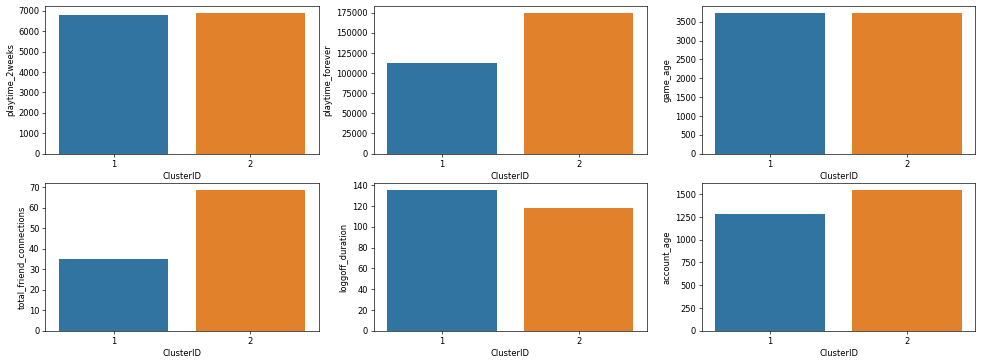

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'playtime_2weeks',data=cluster_means)
plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'playtime_forever',data=cluster_means)
plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'game_age',data=cluster_means)
plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'total_friend_connections',data=cluster_means)
plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'loggoff_duration',data=cluster_means)
plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'account_age',data=cluster_means)

### Differences

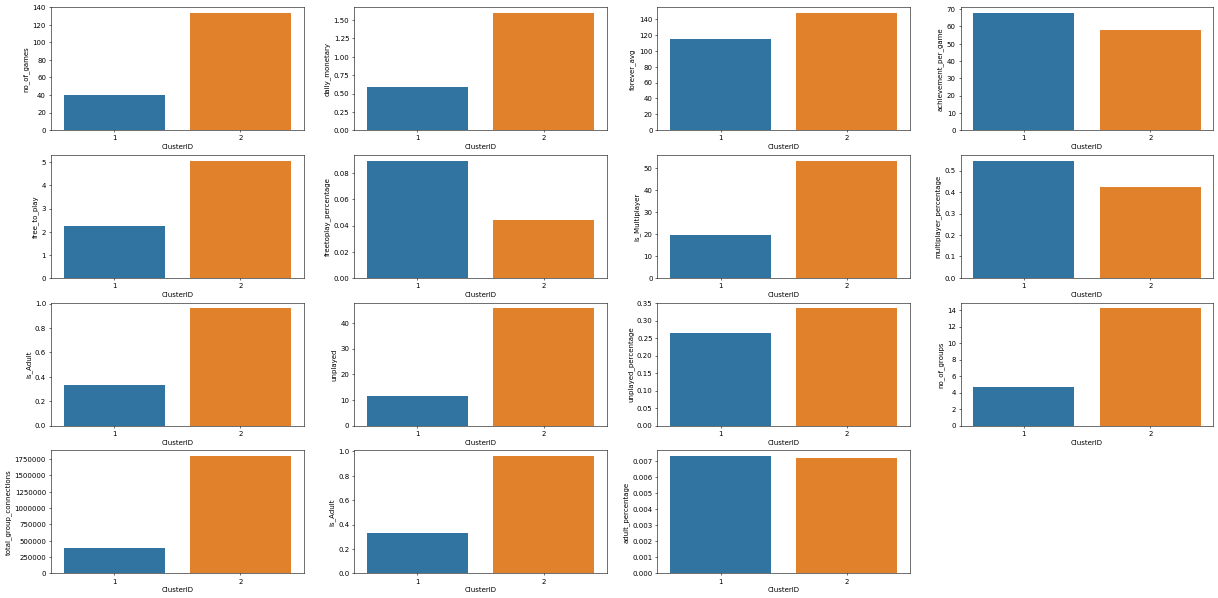

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 15), dpi=50, facecolor='w', edgecolor='k')

plt.subplot(4, 4, 1)
sns.barplot('ClusterID', 'no_of_games',data=cluster_means)
plt.subplot(4, 4, 2)
sns.barplot('ClusterID', 'daily_monetary',data=cluster_means)
plt.subplot(4, 4, 3)
sns.barplot('ClusterID', 'forever_avg',data=cluster_means)
plt.subplot(4, 4, 4)
sns.barplot('ClusterID', 'achievement_per_game',data=cluster_means)
plt.subplot(4, 4, 5)
sns.barplot('ClusterID', 'free_to_play',data=cluster_means)
plt.subplot(4, 4, 6)
sns.barplot('ClusterID', 'freetoplay_percentage',data=cluster_means)
plt.subplot(4, 4, 7)
sns.barplot('ClusterID', 'Is_Multiplayer',data=cluster_means)
plt.subplot(4, 4, 8)
sns.barplot('ClusterID', 'multiplayer_percentage',data=cluster_means)
plt.subplot(4, 4, 9)
sns.barplot('ClusterID', 'Is_Adult',data=cluster_means)
plt.subplot(4, 4, 10)
sns.barplot('ClusterID', 'unplayed',data=cluster_means)
plt.subplot(4, 4, 11)
sns.barplot('ClusterID', 'unplayed_percentage',data=cluster_means)
plt.subplot(4, 4, 12)
sns.barplot('ClusterID', 'no_of_groups',data=cluster_means)
plt.subplot(4, 4, 13)
sns.barplot('ClusterID', 'total_group_connections',data=cluster_means)
plt.subplot(4, 4, 14)
sns.barplot('ClusterID', 'Is_Adult',data=cluster_means)
plt.subplot(4, 4, 15)
sns.barplot('ClusterID', 'adult_percentage',data=cluster_means)

Things we need : 

Average no of games owned by the gamers , 
Average daily spent of the gamers


In [0]:
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,1,0.0,0.461589,6808.314416,113027.445940,40.099434,2.262275,566.441844,80.088563,4.488440,19.540769,0.332482,11.585600,3732.864753,4.691964,324.657841,14.524801,3.943484e+05,34.789813,2557.660090,135.095556,1283.870395,0.423530,0.076687,0.017535,0.000313,0.035797,0.091750,0.003474,0.092317,0.005973,0.043761,0.004813,0.140782,0.06327,0.330164,0.038417,0.005098,0.000246,0.134284,0.081156,0.010919,0.121479,0.002746,0.001251,0.003101,0.228033,0.043105,0.377764,0.041416,0.004808,0.000139,0.135214,0.070395,0.007928,0.115897,0.002279,0.000079,0.002145,0.201684,0.04025,0.000501,0.003339,0.897383,0.004882,0.093894,1070.037494,115.080928,0.585916,67.793393,0.089566,0.545922,0.007298,0.264781,205787.668448,14074.980244,65.173610
1,2,0.0,0.726613,6895.791637,174673.138992,133.410463,5.071828,1773.631934,78.590531,4.254661,53.429119,0.960549,45.610896,3716.777518,14.200027,416.765920,14.284000,1.796843e+06,68.512031,7527.327596,117.831471,1543.859229,0.362191,0.103207,0.043331,0.000452,0.012264,0.153763,0.001679,0.092675,0.008867,0.035880,0.007681,0.123552,0.05446,0.333365,0.054999,0.012009,0.000298,0.134142,0.103496,0.013180,0.123938,0.003969,0.001079,0.003990,0.187520,0.028015,0.392321,0.053419,0.010496,0.000111,0.143339,0.090120,0.008487,0.120552,0.003179,0.000051,0.002905,0.148121,0.02690,0.000888,0.004547,1.011331,0.003695,0.094648,1232.555335,147.811402,1.597294,58.010844,0.044035,0.422080,0.007175,0.334978,330108.845755,14924.595665,270.122026


# Comparisons

The 90th percentile for two-week playtime is 8.9 hours, the 90th
percentile for games owned is 21, and the 90th percentile for lifetime market value is $317.64. Because
these are 90th percentiles, the majority of users exhibit behaviors far below these values, which runs
counter to stereotypes about gamers.

## Ownership

The 80th percentile is 10 games owned and 7 games played.

The “Action” genre is by far the most popular in terms of ownership, followed distantly by the “Strategy” and “Indie” genres. (Graph in previous study)



In [0]:
#Gameplay data
gameplay = pd.read_csv(gameplay_loc)
gameplay.head(n=5)

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46
1,76561197960266039,20,NaN,391.0,2013-05-06 16:00:46
2,76561197960266039,30,NaN,0.0,2013-05-06 16:00:46
3,76561197960266039,40,NaN,748.0,2013-05-06 16:00:46
4,76561197960266039,50,NaN,NaN,2013-05-06 16:00:46


In [0]:
#NaNs need to be made 0
gameplay.playtime_2weeks = gameplay.playtime_2weeks.apply(lambda x: 0 if np.isnan(x) else x)
gameplay.playtime_forever = gameplay.playtime_forever.apply(lambda x: 0 if np.isnan(x) else x)
#Unplayed Games
gameplay['unplayed'] = gameplay.playtime_forever.apply(lambda x: 1 if x==0 else 0)
gameplay['played'] = gameplay.playtime_forever.apply(lambda x: 1 if x>0 else 0)
gameplay.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0


In [0]:
gameplay[gameplay.played==1].playtime_forever.quantile(np.arange(0,1,0.1))
#Median 366
gameplay[(gameplay.played==1) & (
    gameplay.steamid.isin(data[data.ClusterID==1].steamid)
)].playtime_forever.quantile(np.arange(0,1,0.1))
#Median 453
gameplay[gameplay.played==1].playtime_forever.quantile(np.arange(0,1,0.1))
#Median 366
gameplay[(gameplay.played==1) & (
    gameplay.steamid.isin(data[data.ClusterID==2].steamid)
)].playtime_forever.quantile(np.arange(0,1,0.1))
#Median 207

0.0       1.0
0.1      11.0
0.2      29.0
0.3      61.0
0.4     115.0
0.5     207.0
0.6     366.0
0.7     646.0
0.8    1208.0
0.9    2897.0
Name: playtime_forever, dtype: float64

In [0]:
total = gameplay[['steamid','appid']].groupby('steamid',as_index=False).count()
total.columns = ['steamid', 'no_of_games']

play_counts = gameplay[['steamid','unplayed','played']].groupby('steamid',as_index=False).agg({'unplayed':'sum','played':'sum'})
play_counts = play_counts.merge(total,on='steamid',how='inner')

play_counts['unplayed_percentage'] = play_counts.unplayed/play_counts.no_of_games
play_counts.head()

,steamid,unplayed,played,no_of_games,unplayed_percentage
0,76561197960266039,7,10,17,0.411765
1,76561197960269360,19,20,39,0.487179
2,76561197960269424,22,43,65,0.338462
3,76561197960269425,77,145,222,0.346847
4,76561197960269501,63,143,206,0.305825


In [0]:
#Owned games median
#play_counts.no_of_games.quantile(np.arange(0.0,1.0,0.01))
#Median of owned games is 11, 80 percentile is 46

#data[data.ClusterID==1].no_of_games.quantile(np.arange(0.5,1.0,0.01))
#Cluster 1 : 34 games
#data[data.ClusterID==2].no_of_games.quantile(np.arange(0.0,1.0,0.1))
#Cluster 2: 127 games

play_counts[play_counts.steamid.isin(data[data.ClusterID==1].steamid)].no_of_games.quantile(np.arange(0.5,1.0,0.01))
play_counts[play_counts.steamid.isin(data[data.ClusterID==2].steamid)].no_of_games.quantile(np.arange(0.5,1.0,0.01))

0.50    128.00
0.51    130.00
0.52    131.00
0.53    133.00
0.54    135.00
0.55    137.00
0.56    139.00
0.57    141.00
0.58    143.00
0.59    145.00
0.60    147.00
0.61    149.00
0.62    152.00
0.63    154.00
0.64    157.00
0.65    159.00
0.66    161.00
0.67    164.00
0.68    167.00
0.69    170.00
0.70    174.00
0.71    177.00
0.72    180.00
0.73    183.00
0.74    187.00
0.75    190.00
0.76    194.00
0.77    198.00
0.78    202.00
0.79    206.00
0.80    211.00
0.81    216.00
0.82    221.62
0.83    227.00
0.84    235.00
0.85    242.00
0.86    249.00
0.87    258.00
0.88    267.00
0.89    278.00
0.90    290.00
0.91    304.00
0.92    321.00
0.93    339.00
0.94    359.00
0.95    388.00
0.96    431.36
0.97    486.00
0.98    564.18
0.99    706.09
Name: no_of_games, dtype: float64

In [0]:
#played games median
#play_counts.played.quantile(np.arange(0.0,1.0,0.1))
#Median 8, 80 is 32

#Clusters
#play_counts[play_counts.steamid.isin(
#    data[data.ClusterID==1].steamid)].played.quantile(np.arange(0.0,1.0,0.1))
#Cluster 1 median : 24 games median
#play_counts[play_counts.steamid.isin(
#    data[data.ClusterID==2].steamid)].played.quantile(np.arange(0.0,1.0,0.1))
#Cluster 2: 77!

#play_counts.unplayed.quantile(np.arange(0.0,1.0,0.1))
play_counts.unplayed_percentage.quantile(np.arange(0.0,1.0,0.1)) #16%
#Clusters
#play_counts[play_counts.steamid.isin(
#    data[data.ClusterID==1].steamid)].unplayed_percentage.quantile(np.arange(0.0,1.0,0.1))
#Cluster 0 median : 24% median
#play_counts[play_counts.steamid.isin(
#    data[data.ClusterID==2].steamid)].unplayed_percentage.quantile(np.arange(0.0,1.0,0.1))
#Cluster 1: 36%

0.0    0.000000
0.1    0.000000
0.2    0.000000
0.3    0.000000
0.4    0.095238
0.5    0.166667
0.6    0.228070
0.7    0.300000
0.8    0.395833
0.9    0.500000
Name: unplayed_percentage, dtype: float64

In [0]:
play_counts.corr()

,steamid,unplayed,played,no_of_games,unplayed_percentage
steamid,1.000000,-0.180050,-0.271748,-0.248498,-0.356059
unplayed,-0.180050,1.000000,0.652205,0.909064,0.403828
played,-0.271748,0.652205,1.000000,0.908739,0.227833
no_of_games,-0.248498,0.909064,0.908739,1.000000,0.347568
unplayed_percentage,-0.356059,0.403828,0.227833,0.347568,1.000000


## Friendships

 9 million gamers (88.06%) add ten or less friends per year and only 2,500 gamers (0.02%) add more than two hundred friends per year. 

 Without special action, users may not have more than 250 friends. This limit  is raised to 300 if a user links their Steam account with their Facebook account.

 

In [0]:
#Friends data
friends = pd.read_csv(friends_data)

In [0]:
friends.count() #10 Mil friendships

steamid_a        10628381
steamid_b        10628381
relationship     10628381
friend_since     10628381
dateretrieved    10628381
LccTag                  0
steamid          10628381
dtype: int64

In [0]:
len(pd.unique(friends.steamid_a)) #216220
len(pd.unique(friends[friends.steamid_a.isin(data.steamid)].steamid_a)) #60358

60358

In [0]:
#Friends data
friends = pd.read_csv(friends_data)
friends['friend_since_year'] = pd.to_datetime(friends.friend_since).dt.year
friends.head()

#Friendship 
friends = friends[['steamid_a','steamid_b','friend_since_year']].groupby(by=['steamid_a','friend_since_year'],as_index=False).count()
friends.columns = ['steamid_a','friend_since_year','friends']
friends = friends[friends.friend_since_year!=1969]
friends.head()

,steamid_a,friend_since_year,friends
1,76561197960266039,2008,1
2,76561197960266039,2009,2
3,76561197960266039,2010,10
4,76561197960266039,2011,11
5,76561197960266039,2012,100


In [0]:
friends_stats = friends.groupby(by=['steamid_a'],as_index=False).agg({'friends':'median'})
friends_stats.friends.quantile(np.arange(0.5,1.0,0.01)) #10
#Looks like the addicted people showcase similar social behaviour to the casual users

friends_stats[friends_stats.steamid_a.isin(
    data[data.ClusterID==1].steamid)].friends.quantile(np.arange(0.5,1.0,0.01))

friends_stats[friends_stats.steamid_a.isin(
    data[data.ClusterID==2].steamid)].friends.quantile(np.arange(0.5,1.0,0.01))

0.50     11.0
0.51     12.0
0.52     12.0
0.53     12.5
0.54     13.0
0.55     13.0
0.56     14.0
0.57     14.0
0.58     14.5
0.59     15.0
0.60     15.5
0.61     16.0
0.62     16.5
0.63     17.0
0.64     17.5
0.65     18.0
0.66     19.0
0.67     19.5
0.68     20.0
0.69     21.0
0.70     21.5
0.71     22.5
0.72     23.0
0.73     24.0
0.74     25.0
0.75     26.0
0.76     27.0
0.77     28.0
0.78     29.0
0.79     30.0
0.80     31.5
0.81     33.0
0.82     34.0
0.83     36.0
0.84     37.0
0.85     39.0
0.86     41.0
0.87     43.0
0.88     45.0
0.89     47.0
0.90     50.0
0.91     53.0
0.92     56.0
0.93     60.0
0.94     65.0
0.95     70.0
0.96     77.0
0.97     87.0
0.98    102.0
0.99    125.0
Name: friends, dtype: float64

In [0]:
friends_stats[friends_stats.friends<=10].count()[1]*100/friends_stats.count()[1] #51.48%
#friends_stats[friends_stats.friends>50].count()[1]*100/friends_stats.count()[1] #8.33%

51.48163093035013

In [0]:
friends_stats = friends.groupby(by=['friend_since_year'],as_index=False).agg({'friends':'median'})
friends_stats.head()

,friend_since_year,friends
0,2008,1
1,2009,4
2,2010,4
3,2011,4
4,2012,8


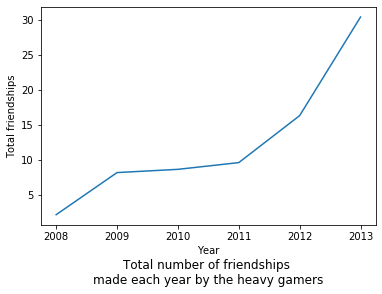

In [0]:
friends_stats = friends.groupby(by=['friend_since_year'],as_index=False).agg({'friends':'mean'})
friends_stats.head()

ax = sns.lineplot('friend_since_year','friends',data=friends_stats)
ax.set(xlabel='Year')
ax.set(ylabel='Total friendships')
plt.title('Total number of friendships \nmade each year by the heavy gamers', y=-0.3)
plt.show()

In [0]:
player_summary = pd.read_csv(player_summary_loc)
player_summary = player_summary[player_summary.steamid.isin(data.steamid)]
accounts = player_summary[['steamid','timecreated']][-player_summary.timecreated.isna()]
accounts['year'] = pd.to_datetime(accounts.timecreated).dt.year
accounts = accounts.groupby('year',as_index=False).count()[['year','steamid']]
accounts.columns = ['year','total']
accounts.head()

,year,total
0,2003,1406
1,2004,3402
2,2005,1886
3,2006,2112
4,2007,4077


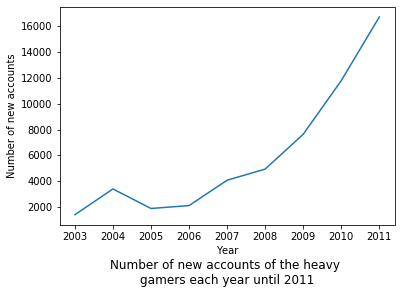

In [0]:
ax = sns.lineplot('year','total',data=accounts[accounts.year<2012])
ax.set(xlabel='Year')
ax.set(ylabel='Number of new accounts')
plt.title('Number of new accounts of the heavy \ngamers each year until 2011', y=-0.3)
plt.show()

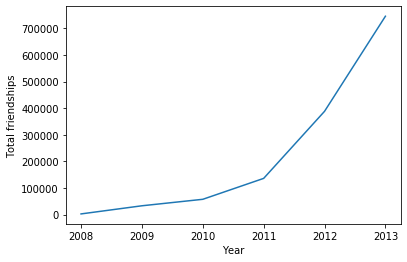

In [0]:
friends_stats = friends[friends.steamid_a.isin(
    data[data.ClusterID==1].steamid
)].groupby(by=['friend_since_year'],as_index=False).agg({'friends':'sum'})
friends_stats.head()

ax = sns.lineplot('friend_since_year','friends',data=friends_stats)
ax.set(xlabel='Year')
ax.set(ylabel='Total friendships')
plt.show()

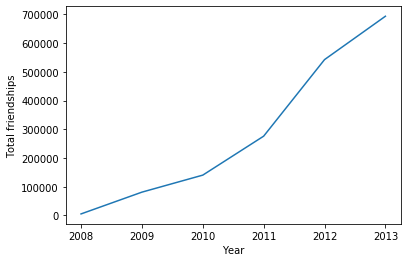

In [0]:
friends_stats = friends[friends.steamid_a.isin(
    data[data.ClusterID==2].steamid
)].groupby(by=['friend_since_year'],as_index=False).agg({'friends':'sum'})
friends_stats.head()

ax = sns.lineplot('friend_since_year','friends',data=friends_stats)#.set_title('lalala')
ax.set(xlabel='Year')
ax.set(ylabel='Total friendships')
plt.show()

In [0]:
friends_stats = friends[friends.friend_since_year==2012].groupby(by=['friend_since_year'],as_index=False).agg({'friends':'median'})
friends_stats.head() #8 friends

,friend_since_year,friends
0,2012,8


Social behaviour of addicted users are similar to that of casual players

In [0]:
#Looking at the clusters
cluster_means[['ClusterID','total_friend_connections','avg_friend_duration','account_age']].head()

#1 has fewer friends and newer friends 
#2 keeps older and has more friends
#However 1 : Accounts are newer by almost an year on average

,ClusterID,total_friend_connections,avg_friend_duration,account_age
0,1,34.789813,324.657841,1283.870395
1,2,68.512031,416.765920,1543.859229


In [0]:

friends_stats = friends[(friends.steamid_a.isin(data[data.ClusterID==1].steamid)) & 
                        (friends.friend_since_year==2012)].groupby(by=['steamid_a'],as_index=False).agg({'friends':'median'})
friends_stats.friends.quantile(np.arange(0.1,1.1,0.1)) #6


#1 : Median 6

0.1      1.0
0.2      2.0
0.3      3.0
0.4      5.0
0.5      6.0
0.6      9.0
0.7     12.0
0.8     18.0
0.9     29.0
1.0    263.0
Name: friends, dtype: float64

In [0]:
friends_stats = friends[friends.steamid_a.isin(data[data.ClusterID==2].steamid)].groupby(by=['steamid_a'],
                                                                                        as_index=False).agg({'friends':'median'})
friends_stats.friends.quantile(np.arange(0.1,1.1,0.1)) #11

0.1      2.0
0.2      4.0
0.3      6.0
0.4      8.0
0.5     11.0
0.6     15.5
0.7     21.5
0.8     31.5
0.9     50.0
1.0    304.0
Name: friends, dtype: float64

## Groups

We find that large amounts of groups have members with playtime for larger numbers of games (game counts of 100 - 1000). However, as the number of  distinct games continues to increase the number of corresponding groups  decreases. This decline occurs because most users who own games (89.78%) own  less than 20 games, making large numbers of distinct games across the group a  rarity.

In [0]:
cluster_means[['ClusterID','no_of_groups']].head()
#1 part of 5 groups and 2 is 14.

,ClusterID,no_of_groups
0,1,4.691964
1,2,14.200027


In [0]:
#Lets look at the overall data
groups = pd.read_csv(groups_data)
groups.groupby(by = 'steamid',as_index=False).count().groupid.quantile(np.arange(0.5,1,0.01))
#Median is 5 groups overall

#Cluster1
groups[groups.steamid.isin(data[data.ClusterID==1].steamid)].groupby(by = 'steamid',as_index=False
                                                                     ).count().groupid.quantile(np.arange(0.5,1,0.01))
#median 4 and 90 percentile 16

#Cluster2
groups[groups.steamid.isin(data[data.ClusterID==2].steamid)].groupby(by = 'steamid',as_index=False
                                                                     ).count().groupid.quantile(np.arange(0.5,1,0.01))
#median 12 and 90 percentile 60

0.50     12.0
0.51     13.0
0.52     13.0
0.53     14.0
0.54     14.0
0.55     15.0
0.56     15.0
0.57     15.0
0.58     16.0
0.59     16.0
0.60     17.0
0.61     18.0
0.62     18.0
0.63     19.0
0.64     19.0
0.65     20.0
0.66     21.0
0.67     21.0
0.68     22.0
0.69     23.0
0.70     24.0
0.71     25.0
0.72     25.0
0.73     27.0
0.74     28.0
0.75     29.0
0.76     30.0
0.77     31.0
0.78     32.0
0.79     34.0
0.80     35.0
0.81     36.0
0.82     38.0
0.83     40.0
0.84     42.0
0.85     44.0
0.86     47.0
0.87     50.0
0.88     53.0
0.89     57.0
0.90     61.0
0.91     66.0
0.92     72.0
0.93     79.0
0.94     88.0
0.95    100.0
0.96    114.0
0.97    137.0
0.98    173.0
0.99    256.0
Name: groupid, dtype: float64

## Play times

The top 20% of Steam users account for 82.4% of the total playtime of all games played on Steam.
Over 80% of Steam gamers had not played any of their games at all in the two weeks prior to our requesting their gaming data.
The 80th percentile is 32.05 hours, or about 16 hours a week on average.
80th percentile value of non-zero two-week playtimes corresponds to the 95th percentile of overall two-week playtimes.
There are indeed some users who have extreme playtimes on the order of 80-90% of the maximum two-week playtime. These values constitute a very minor portion of our data (0.01% of users).
67.7% of two-week playtimes as well as 57.7% of total playtimes are devoted entirely to playing multiplayer games, despite the fact that only 48.7% of games on Steam are multiplayer games (i.e. have a multiplayer component)


In [0]:
gameplay.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0


In [0]:
play_stats = gameplay.merge(data,on='steamid',how='inner')
#play_stats = gameplay[gameplay.played==1].groupby(by='steamid',as_index=False).agg(
#    {'playtime_2weeks' : 'median','playtime_forever':'median'})

play_stats = play_stats[['playtime_2weeks_x','playtime_forever_x','played','ClusterID']]
play_stats.head()
play_stats[play_stats.played==1].groupby(by='ClusterID',as_index=False).agg(
    {'playtime_2weeks_x' : 'mean','playtime_forever_x':'mean'})

,ClusterID,playtime_2weeks_x,playtime_forever_x
0,1,246.349606,4087.082287
1,2,79.900965,2042.760362


In [0]:
#Playtime 2 weeks statistics
play_stats = gameplay.groupby(by='steamid',as_index=False).agg({'playtime_2weeks' : 'sum','playtime_forever':'sum'})

play_stats.playtime_2weeks.quantile([0.5,0.8,0.9,0.95,0.99])/60
#Median is 6363.0 minutes in 2 weeks while the 80th percentile is 8347.0 minutes

play_stats[play_stats.steamid.isin(data[data.ClusterID==1].steamid
                                   )].playtime_2weeks.quantile([0.5,0.8,0.9,0.95,0.99])/60
#median 6256.0

play_stats[play_stats.steamid.isin(data[data.ClusterID==2].steamid
                                   )].playtime_2weeks.quantile([0.5,0.8,0.9,0.95,0.99])/60
#6343.0

0.50    105.733333
0.80    136.666667
0.90    165.800000
0.95    203.122500
0.99    318.571167
Name: playtime_2weeks, dtype: float64

In [0]:
play_stats.playtime_forever.quantile([0.5,0.8,0.9,0.95,0.99])/60
#Median is 6363.0 minutes in 2 weeks while the 80th percentile is 8347.0 minutes

play_stats[play_stats.steamid.isin(data[data.ClusterID==1].steamid
                                   )].playtime_forever.quantile([0.5,0.8,0.9,0.95,0.99])/60
#median 6256.0

play_stats[play_stats.steamid.isin(data[data.ClusterID==2].steamid
                                   )].playtime_forever.quantile([0.5,0.8,0.9,0.95,0.99])/60
#6343.0

0.50     2634.775000
0.80     4312.563333
0.90     5508.005000
0.95     6697.865833
0.99    10039.651833
Name: playtime_forever, dtype: float64

In [0]:
#Playtime forever statistics

#play_stats.playtime_forever.quantile(np.arange(0,1,0.1))
#Median is around 90657.0.0 minutes 

#play_stats[play_stats.steamid.isin(data[data.ClusterID==1].steamid)].playtime_forever.quantile(np.arange(0,1,0.1))
#Median 92656.0

#play_stats[play_stats.steamid.isin(data[data.ClusterID==2].steamid)].playtime_forever.quantile(np.arange(0,1,0.1))
#Median: 157792.5

cluster_means[['ClusterID','account_age','playtime_forever','forever_avg']]
#Cluster 1 plays 115 minutes everyday on average
#Cluster 2 plays 147 minutes

,ClusterID,account_age,playtime_forever,forever_avg
0,1,1283.870395,113027.445940,115.080928
1,2,1543.859229,174673.138992,147.811402


In [0]:
data.forever_avg.quantile(np.arange(0,1,0.1))
#Median 109
#data[data.forever_avg<110].account_age.quantile(np.arange(0,1,0.1))
#1208.0

0.0      3.544423
0.1     39.249158
0.2     57.887525
0.3     74.488576
0.4     91.439069
0.5    109.880178
0.6    130.888406
0.7    155.899848
0.8    190.536096
0.9    227.275396
Name: forever_avg, dtype: float64

## Money

 The top 20% of Steam users account for 73% of the total current market value of owned games on Steam. 
 The action genre constitutes 49.24% of total playtime on Steam as well as 51.88% of the total current market value of Steam users’ game libraries.
 

In [0]:
apps = pd.read_csv(app_id_loc)

In [0]:
apps['game_age'] = (pd.to_datetime('today')-pd.to_datetime(apps.Release_Date)).dt.days
apps.head()

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age
0,10,Counter-Strike,game,9.99,2000-11-01 00:00:00,88,0,1,7047
1,20,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1,0,1,7627
2,30,Day of Defeat,game,4.99,2003-05-01 00:00:00,79,0,1,6136
3,40,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1,0,1,6835
4,50,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1,0,1,7413


In [0]:
gameplay_apps = gameplay.merge(apps,how='left',on='appid')
gameplay_apps.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7047.0
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7627.0
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6136.0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6835.0
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7413.0


In [0]:
#apps.Price.median() #4.99
#gameplay_apps.isna().sum()
gameplay_apps.Price = gameplay_apps.Price.apply(
    lambda x: 4.99 if pd.isnull(x) else x
)
gameplay_apps.isna().sum()

steamid                  0
appid                    0
playtime_2weeks          0
playtime_forever         0
dateretrieved            0
unplayed                 0
played                   0
Title               729988
Type                729988
Price                    0
Release_Date        729988
Rating              729988
Required_Age        729988
Is_Multiplayer      729988
game_age            729988
dtype: int64

In [0]:
monetary = gameplay_apps[['steamid','Price','playtime_2weeks','playtime_forever']].groupby(
    by=['steamid'],as_index=False).agg({'Price':'sum','playtime_2weeks':'sum'
    ,'playtime_forever':'sum'
    })

monetary.head()

,steamid,Price,playtime_2weeks,playtime_forever
0,76561197960266039,124.85,8076.0,121756.0
1,76561197960269360,392.63,5575.0,106560.0
2,76561197960269424,618.42,5265.0,274562.0
3,76561197960269425,2375.87,5761.0,1408888.0
4,76561197960269501,2641.03,6543.0,170598.0


In [0]:
monetary.Price.quantile(np.arange(0.5,1.0,0.01))

monetary[monetary.steamid.isin(
    data[data.ClusterID==1].steamid
)].Price.quantile(np.arange(0.5,1.0,0.01))

monetary[monetary.steamid.isin(
    data[data.ClusterID==2].steamid
)].Price.quantile(np.arange(0.5,1.0,0.01))

0.50    1700.9750
0.51    1724.7510
0.52    1748.6756
0.53    1773.8000
0.54    1798.7000
0.55    1821.7810
0.56    1852.7640
0.57    1877.6000
0.58    1906.5434
0.59    1934.5769
0.60    1965.2740
0.61    1993.4653
0.62    2017.9500
0.63    2046.5266
0.64    2078.4368
0.65    2108.3830
0.66    2141.5224
0.67    2178.1678
0.68    2209.9776
0.69    2250.2538
0.70    2286.3010
0.71    2320.7874
0.72    2358.8440
0.73    2394.9846
0.74    2441.1904
0.75    2483.6175
0.76    2528.3356
0.77    2576.2221
0.78    2625.0124
0.79    2678.9350
0.80    2727.3780
0.81    2785.0942
0.82    2848.5300
0.83    2917.2250
0.84    3000.8388
0.85    3086.0880
0.86    3166.3986
0.87    3265.4170
0.88    3374.7764
0.89    3489.5832
0.90    3623.2000
0.91    3774.1269
0.92    3951.0052
0.93    4154.8066
0.94    4386.4752
0.95    4713.1555
0.96    5197.9900
0.97    5747.3760
0.98    6469.4756
0.99    8066.7966
Name: Price, dtype: float64

In [0]:
monetary = gameplay_apps[['steamid','Price','playtime_2weeks','playtime_forever','unplayed','played']].groupby(
    by=['steamid','played','unplayed'],as_index=False).agg({'Price':'sum','playtime_2weeks':'sum'
    ,'playtime_forever':'sum'
    })

monetary.head()

,steamid,played,unplayed,Price,playtime_2weeks,playtime_forever
0,76561197960266039,0,1,39.94,0.0,0.0
1,76561197960266039,1,0,84.91,8076.0,121756.0
2,76561197960269360,0,1,174.82,0.0,0.0
3,76561197960269360,1,0,217.81,5575.0,106560.0
4,76561197960269424,0,1,150.79,0.0,0.0


In [0]:
monetary.groupby('steamid',as_index=False).agg({'Price':'sum'}).Price.quantile(np.arange(0,1,0.1))

0.0       0.000
0.1       0.000
0.2      19.990
0.3      44.970
0.4      84.930
0.5     149.910
0.6     249.870
0.7     399.720
0.8     649.562
0.9    1155.226
Name: Price, dtype: float64

In [0]:
monetary[monetary.played==1][['Price','playtime_2weeks','playtime_forever']].corr()

,Price,playtime_2weeks,playtime_forever
Price,1.000000,-0.000157,0.206401
playtime_2weeks,-0.000157,1.000000,0.337881
playtime_forever,0.206401,0.337881,1.000000


In [0]:
monetary[(monetary.played==1) & (
    monetary.steamid.isin(data[data.ClusterID==1].steamid))
][['Price','playtime_2weeks','playtime_forever']].corr()

,Price,playtime_2weeks,playtime_forever
Price,1.000000,-0.040002,0.14869
playtime_2weeks,-0.040002,1.000000,0.25979
playtime_forever,0.148690,0.259790,1.00000


In [0]:
monetary[(monetary.played==1) & (
    monetary.steamid.isin(data[data.ClusterID==2].steamid))
][['Price','playtime_2weeks','playtime_forever']].corr()

#2weeks and forever moderate correlation

,Price,playtime_2weeks,playtime_forever
Price,1.000000,0.061807,0.165749
playtime_2weeks,0.061807,1.000000,0.460339
playtime_forever,0.165749,0.460339,1.000000


In [0]:
monetary_play = monetary.merge(play_counts,how='inner',on='steamid')
monetary_play.head()

,steamid,played_x,unplayed_x,Price,playtime_2weeks,playtime_forever,unplayed_y,played_y,no_of_games,unplayed_percentage
0,76561197960266039,0,1,39.94,0.0,0.0,7,10,17,0.411765
1,76561197960266039,1,0,84.91,8076.0,121756.0,7,10,17,0.411765
2,76561197960269360,0,1,174.82,0.0,0.0,19,20,39,0.487179
3,76561197960269360,1,0,217.81,5575.0,106560.0,19,20,39,0.487179
4,76561197960269424,0,1,150.79,0.0,0.0,22,43,65,0.338462


In [0]:
monetary_play[monetary_play.played_x==1][[
  'Price','playtime_2weeks','playtime_forever','played_y','no_of_games'
]].corr()

,Price,playtime_2weeks,playtime_forever,played_y,no_of_games
Price,1.000000,-0.000157,0.206401,0.982039,0.884806
playtime_2weeks,-0.000157,1.000000,0.337881,0.004365,0.024708
playtime_forever,0.206401,0.337881,1.000000,0.210135,0.177660
played_y,0.982039,0.004365,0.210135,1.000000,0.908739
no_of_games,0.884806,0.024708,0.177660,0.908739,1.000000


In [0]:
monetary_play[(monetary_play.played_x==1) & (monetary.steamid.isin(data[data.ClusterID==1].steamid))][[
  'Price','playtime_2weeks','playtime_forever','played_y','no_of_games'
]].corr()

,Price,playtime_2weeks,playtime_forever,played_y,no_of_games
Price,1.000000,-0.040002,0.148690,0.967110,0.893249
playtime_2weeks,-0.040002,1.000000,0.259790,-0.041036,-0.021882
playtime_forever,0.148690,0.259790,1.000000,0.151749,0.108425
played_y,0.967110,-0.041036,0.151749,1.000000,0.924803
no_of_games,0.893249,-0.021882,0.108425,0.924803,1.000000


In [0]:
monetary_play[(monetary_play.played_x==1) & (monetary.steamid.isin(data[data.ClusterID==2].steamid))][[
  'Price','playtime_2weeks','playtime_forever','played_y','no_of_games'
]].corr()

,Price,playtime_2weeks,playtime_forever,played_y,no_of_games
Price,1.000000,0.061807,0.165749,0.974430,0.779270
playtime_2weeks,0.061807,1.000000,0.460339,0.068807,0.099104
playtime_forever,0.165749,0.460339,1.000000,0.174990,0.101034
played_y,0.974430,0.068807,0.174990,1.000000,0.808033
no_of_games,0.779270,0.099104,0.101034,0.808033,1.000000


In [0]:
cluster_means[['ClusterID','Price','daily_monetary','account_age']]

#0 spends less, has newer accounts but spends around half a dollar everyday on average
#Whereas 1 spends over 1.5 dollars everyday

,ClusterID,Price,daily_monetary,account_age
0,1,566.441844,0.585916,1283.870395
1,2,1773.631934,1.597294,1543.859229


In [0]:
data.daily_monetary.quantile(np.arange(0,1,0.1))

0.0    0.000000
0.1    0.138682
0.2    0.277766
0.3    0.415605
0.4    0.559234
0.5    0.719495
0.6    0.915857
0.7    1.161696
0.8    1.514192
0.9    1.963059
Name: daily_monetary, dtype: float64

### Money vs Play

In [0]:
gameplay_apps.head()
gameplay_apps['year'] = pd.to_datetime(gameplay_apps.Release_Date).dt.year
gameplay_apps.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0


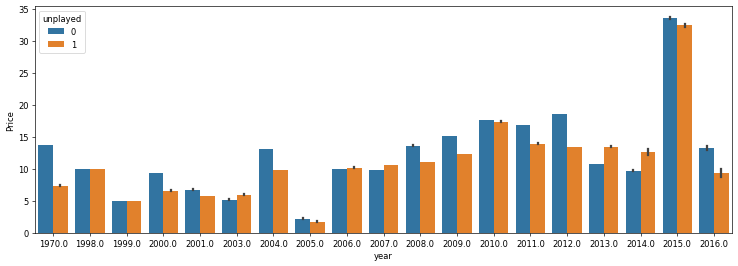

In [0]:
figure(num=None, figsize=(15, 5), dpi=60, facecolor='w', edgecolor='k')
sns.barplot(gameplay_apps.year,gameplay_apps.Price,hue=gameplay_apps.unplayed)

In [0]:
genres= pd.read_csv(genres_loc)
genres.head()
gameplay_apps_genres = gameplay_apps.merge(genres,on='appid',how='inner')
gameplay_apps_genres.sort_values(['steamid','Genre']).head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,Genre
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0,Action
54299,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0,Action
79053,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0,Action
110142,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0,Action
140526,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,Action


In [0]:
pd.unique(gameplay_apps_genres.Genre)

array(['Action', 'Free to Play', 'Indie', 'Simulation', 'Strategy',
       'Casual', 'Adventure', 'RPG', 'Racing', 'Sports', 'Early Access',
       'Massively Multiplayer', 'Design & Illustration', 'Web Publishing',
       'Audio Production', 'Software Training', 'Utilities',
       'Video Production', 'Accounting', 'Education',
       'Animation & Modeling', 'Photo Editing'], dtype=object)

In [0]:
'''
figure(num=None, figsize=(10, 15), dpi=60, facecolor='w', edgecolor='k')
sns.barplot('Price','Genre',data=gameplay_apps_genres[gameplay_apps_genres.Genre.isin(
    ['Action', 'Free to Play', 'Indie', 'Simulation', 'Strategy',
       'Casual', 'Adventure', 'RPG', 'Racing', 'Sports', 'Early Access',
       'Massively Multiplayer']
)],hue='unplayed')
'''

"\nfigure(num=None, figsize=(10, 15), dpi=60, facecolor='w', edgecolor='k')\nsns.barplot('Price','Genre',data=gameplay_apps_genres[gameplay_apps_genres.Genre.isin(\n    ['Action', 'Free to Play', 'Indie', 'Simulation', 'Strategy',\n       'Casual', 'Adventure', 'RPG', 'Racing', 'Sports', 'Early Access',\n       'Massively Multiplayer']\n)],hue='unplayed')\n"

In [0]:
gameplay_apps_genres_cluster = gameplay_apps_genres.merge(data[['steamid','ClusterID']],on='steamid',how='inner')
gameplay_apps_genres_cluster.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,Genre,ClusterID
0,76561197960269425,10,0.0,1304.0,2013-05-06 15:59:30,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0,Action,2
1,76561197960269425,20,0.0,0.0,2013-05-06 15:59:30,1,0,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0,Action,2
2,76561197960269425,30,0.0,0.0,2013-05-06 15:59:30,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0,Action,2
3,76561197960269425,40,0.0,0.0,2013-05-06 15:59:30,1,0,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0,Action,2
4,76561197960269425,50,0.0,305.0,2013-05-06 15:59:30,0,1,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,Action,2


In [0]:
gameplay_apps_genres_cluster_percent = gameplay_apps_genres_cluster.merge(
    gameplay_apps_genres_cluster[['ClusterID','Price']].groupby('ClusterID',as_index=False).agg({'Price':'sum'})
    ,on='ClusterID',how='inner')

gameplay_apps_genres_cluster_percent.Price_x = gameplay_apps_genres_cluster_percent.Price_x/gameplay_apps_genres_cluster_percent.Price_y
gameplay_apps_genres_cluster_percent.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price_x,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,Genre,ClusterID,Price_y
0,76561197960269425,10,0.0,1304.0,2013-05-06 15:59:30,0,1,Counter-Strike,game,1.351672e-07,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0,Action,2,7.390844e+07
1,76561197960269425,20,0.0,0.0,2013-05-06 15:59:30,1,0,Team Fortress Classic,game,6.751597e-08,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0,Action,2,7.390844e+07
2,76561197960269425,30,0.0,0.0,2013-05-06 15:59:30,1,0,Day of Defeat,game,6.751597e-08,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0,Action,2,7.390844e+07
3,76561197960269425,40,0.0,0.0,2013-05-06 15:59:30,1,0,Deathmatch Classic,game,6.751597e-08,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0,Action,2,7.390844e+07
4,76561197960269425,50,0.0,305.0,2013-05-06 15:59:30,0,1,Half-Life: Opposing Force,game,6.751597e-08,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,Action,2,7.390844e+07


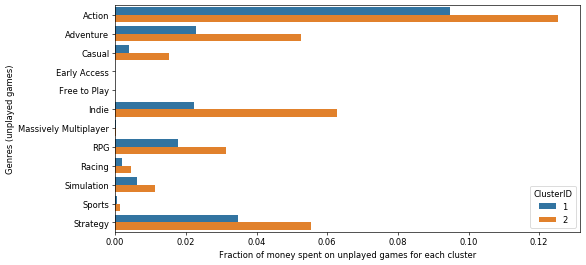

In [0]:
genre_price = gameplay_apps_genres_cluster_percent[['Genre','Price_x','ClusterID']][(
    gameplay_apps_genres_cluster_percent.unplayed==1) & (gameplay_apps_genres_cluster_percent.Genre.isin(
    ['Action', 'Free to Play', 'Indie', 'Simulation', 'Strategy',
       'Casual', 'Adventure', 'RPG', 'Racing', 'Sports', 'Early Access',
       'Massively Multiplayer']))].groupby(
    ['Genre','ClusterID'],as_index=False).agg({'Price_x':'sum'}).sort_values('Genre',ascending=True)

figure(num=None, figsize=(10, 5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot(genre_price.Price_x,genre_price.Genre,hue=genre_price.ClusterID)
ax.set(xlabel='Fraction of money spent on unplayed games for each cluster')
ax.set(ylabel='Genres (unplayed games)')
plt.show()


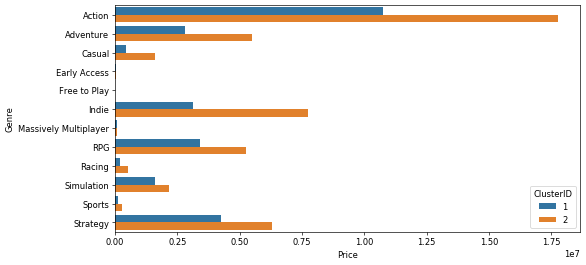

In [0]:
genre_price = gameplay_apps_genres_cluster[['Genre','Price','ClusterID']][(
    gameplay_apps_genres_cluster.unplayed==0) & (gameplay_apps_genres_cluster.Genre.isin(
    ['Action', 'Free to Play', 'Indie', 'Simulation', 'Strategy',
       'Casual', 'Adventure', 'RPG', 'Racing', 'Sports', 'Early Access',
       'Massively Multiplayer']))].groupby(
    ['Genre','ClusterID'],as_index=False).agg({'Price':'sum'}).sort_values('Genre',ascending=True)

figure(num=None, figsize=(10, 5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('Price','Genre',data=genre_price,hue='ClusterID')


##Yearly ownership

In [0]:
gameplay_apps.head()
gameplay_apps['year'] = pd.to_datetime(gameplay_apps.Release_Date).dt.year
gameplay_apps.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0


In [0]:
gameplay_apps_year = gameplay_apps[['steamid','year','unplayed','played']]
gameplay_apps_year = gameplay_apps_year.merge(data,on='steamid',how='inner')
gameplay_apps_year = gameplay_apps_year[['steamid','year','unplayed_x','played','ClusterID']]
gameplay_apps_year.columns = ['steamid','year','unplayed','played','ClusterID']
gameplay_apps_year.head()

,steamid,year,unplayed,played,ClusterID
0,76561197960269425,2000.0,0,1,2
1,76561197960269425,1999.0,1,0,2
2,76561197960269425,2003.0,1,0,2
3,76561197960269425,2001.0,1,0,2
4,76561197960269425,1999.0,0,1,2


In [0]:
year_totals = gameplay_apps_year.groupby(by=['year','ClusterID'],as_index=False).count()[['year','ClusterID','steamid']]
year_totals.columns= ['year','ClusterID','no_of_games']
year_totals = year_totals[year_totals.year<2013]
year_totals.head()

,year,ClusterID,no_of_games
0,1970.0,1,19545
1,1970.0,2,40244
2,1998.0,1,6853
3,1998.0,2,10088
4,1999.0,1,11101


In [0]:
gameplay_apps_year_merge = gameplay_apps_year.groupby(['year','unplayed','played','ClusterID'],as_index=False).count()
gameplay_apps_year_merge = gameplay_apps_year_merge.merge(year_totals,on=['year','ClusterID'],how='inner')
gameplay_apps_year_merge['percentage'] = gameplay_apps_year_merge.steamid/gameplay_apps_year_merge.no_of_games
gameplay_apps_year_merge.head()

,year,unplayed,played,ClusterID,steamid,no_of_games,percentage
0,1970.0,0,1,1,17367,19545,0.888565
1,1970.0,1,0,1,2178,19545,0.111435
2,1970.0,0,1,2,29418,40244,0.730991
3,1970.0,1,0,2,10826,40244,0.269009
4,1998.0,0,1,1,3750,6853,0.547206


In [0]:
#gameplay_apps_year_merge.columns = ['year', 'unplayed', 'played', 'Groups', 'steamid', 'no_of_games', 'unplayed percentage']

[Text(0, 0.5, 'Unplayed percentage of games')]

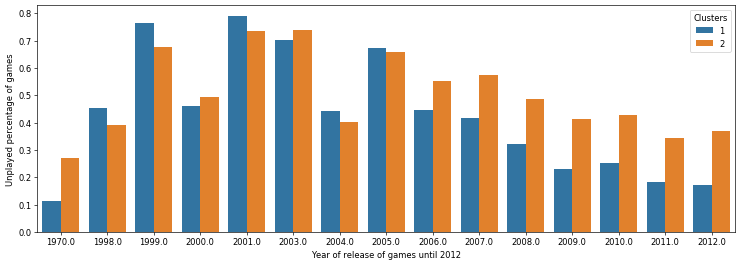

In [0]:
gameplay_apps_year_merge.columns = ['year', 'unplayed', 'played', 'Clusters', 'steamid', 'no_of_games', 'unplayed percentage']
figure(num=None, figsize=(15, 5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('year','unplayed percentage',data=gameplay_apps_year_merge[gameplay_apps_year_merge.unplayed==1],hue='Clusters')
ax.set(xlabel='Year of release of games until 2012')
ax.set(ylabel='Unplayed percentage of games')
#plt.title('Percentage of unplayed games every year until 2012 for the Clusters', y=-0.2)


In [0]:
year_totals.head()

,year,ClusterID,no_of_games
0,1970.0,1,19545
1,1970.0,2,40244
2,1998.0,1,6853
3,1998.0,2,10088
4,1999.0,1,11101


### Unplayed for free games

Text(0.5, -0.2, 'Percentage of unplayed games every year until 2012 for the Groups')

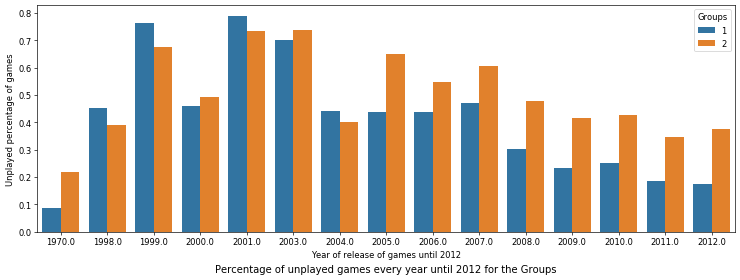

In [0]:
gameplay_apps_year = gameplay_apps[['steamid','year','unplayed','played']][gameplay_apps.Price>0]
gameplay_apps_year = gameplay_apps_year.merge(data,on='steamid',how='inner')
gameplay_apps_year = gameplay_apps_year[['steamid','year','unplayed_x','played','ClusterID']]
gameplay_apps_year.columns = ['steamid','year','unplayed','played','ClusterID']

year_totals = gameplay_apps_year.groupby(by=['year','ClusterID'],as_index=False).count()[['year','ClusterID','steamid']]
year_totals.columns= ['year','ClusterID','no_of_games']
year_totals = year_totals[year_totals.year<2013]
year_totals.head()

gameplay_apps_year_merge = gameplay_apps_year.groupby(['year','unplayed','played','ClusterID'],as_index=False).count()
gameplay_apps_year_merge = gameplay_apps_year_merge.merge(year_totals,on=['year','ClusterID'],how='inner')
gameplay_apps_year_merge['percentage'] = gameplay_apps_year_merge.steamid/gameplay_apps_year_merge.no_of_games
gameplay_apps_year_merge.head()

gameplay_apps_year_merge.columns = ['year', 'unplayed', 'played', 'Groups', 'steamid', 'no_of_games', 'unplayed percentage']

gameplay_apps_year_merge.columns = ['year', 'unplayed', 'played', 'Groups', 'steamid', 'no_of_games', 'unplayed percentage']
figure(num=None, figsize=(15, 5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('year','unplayed percentage',data=gameplay_apps_year_merge[gameplay_apps_year_merge.unplayed==1],hue='Groups')
ax.set(xlabel='Year of release of games until 2012')
ax.set(ylabel='Unplayed percentage of games')
plt.title('Percentage of unplayed games every year until 2012 for the Groups', y=-0.2)


## Achievements

The number of achievements offered by games ranges from 0 to 1629, with a mode of 12, an average of 33.1, and a median of 24.
When evaluating games’ cumulative playtime with respect to the number of achievements they offer,we found a very weak positive correlation (Spearman’s correlation, R = 0.16). However, when we constrain the range of offered achievements to only games that offer 1-90 achievements, we find a moderate correlation (R = 0.53). Beyond the range of 90 achievements offered, there is no correlation with playtime (R = −0.02). This suggests a possibility that achievements incentivize more playtime than would have otherwise occurred.

In [0]:
cluster_means[['ClusterID','avg_percentage_completion','no_of_games','total_achievements','achievement_per_game']]

#1 picks slightly easier games with more depth

,ClusterID,avg_percentage_completion,no_of_games,total_achievements,achievement_per_game
0,1,14.524801,40.099434,2557.660090,67.793393
1,2,14.284000,133.410463,7527.327596,58.010844


In [0]:
achievements = pd.read_csv(achievement_loc)
ac_count = achievements.groupby(by='appid',as_index=False).agg(
    {'Name':'count','Percentage':'mean'}
)
ac_count.columns = ['appid','ach_count','avg_percentage']
ac_count.head()

,appid,ach_count,avg_percentage
0,50,5,0.057843
1,60,3,0.043437
2,220,33,17.638451
3,240,148,16.973004
4,300,55,5.954849


In [0]:
gameplay.head()
gameplay_ach = gameplay.merge(ac_count,on='appid',how='inner')
gameplay_ach.sort_values('steamid',ascending=False).head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,ach_count,avg_percentage
55434,76561198086329948,60,0.0,0.0,2013-11-05 10:09:03,1,0,3,0.043437
843371,76561198086303848,550,48.0,1453.0,2013-11-05 09:36:02,0,1,70,12.836382
4000668,76561198086303848,209160,0.0,0.0,2013-11-05 09:36:02,1,0,40,36.753345
2238363,76561198086303848,10180,27.0,224.0,2013-11-05 09:36:02,0,1,50,34.367665
1122970,76561198086303848,24240,13.0,561.0,2013-11-05 09:36:02,0,1,60,5.669421


In [0]:
gameplay_ach_summary = gameplay_ach[gameplay_ach.played==1][['steamid','ach_count','avg_percentage']].groupby(
    by='steamid',as_index=False).agg({'ach_count':'median','avg_percentage':'median'})
gameplay_ach_summary.head()

,steamid,ach_count,avg_percentage
0,76561197960266039,90.5,15.401724
1,76561197960269360,28.0,13.611378
2,76561197960269424,62.0,15.896916
3,76561197960269425,36.0,11.922427
4,76561197960269501,50.0,12.360830


In [0]:
gameplay_ach_summary[gameplay_ach_summary.steamid.isin(
    data[data.ClusterID==1].steamid
)].ach_count.quantile(np.arange(0.1,1.1,0.1)) 
#Median 63, 90 85
gameplay_ach_summary[gameplay_ach_summary.steamid.isin(
    data[data.ClusterID==1].steamid
)].avg_percentage.quantile(np.arange(0.1,1.1,0.1)) 
#Median 15.2, 90 19.18

gameplay_ach_summary[gameplay_ach_summary.steamid.isin(
    data[data.ClusterID==2].steamid
)].ach_count.quantile(np.arange(0.1,1.1,0.1)) 
#Median 53, 90 67
gameplay_ach_summary[gameplay_ach_summary.steamid.isin(
    data[data.ClusterID==2].steamid
)].avg_percentage.quantile(np.arange(0.1,1.1,0.1)) 
#Median 14.36, 90 16.94

0.1    11.972060
0.2    12.836382
0.3    13.420714
0.4    13.906187
0.5    14.363478
0.6    15.090118
0.7    15.401492
0.8    15.860894
0.9    16.944819
1.0    34.795377
Name: avg_percentage, dtype: float64

## Player Data

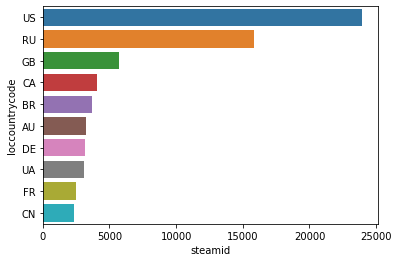

In [0]:
player_summary = pd.read_csv(player_summary_loc)
#player_summary.head()
#sns.countplot(player_summary.loccountrycode,hist=True)
player_data = player_summary[['loccountrycode','steamid']].groupby(
    'loccountrycode',as_index=False).count().sort_values('steamid',ascending=False).head(n=10)

sns.barplot('steamid','loccountrycode',data=player_data)

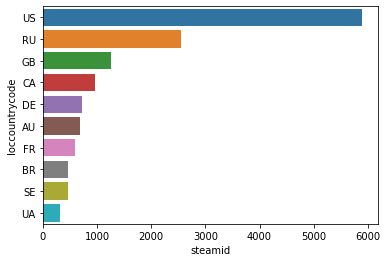

In [0]:
player_data = player_summary[player_summary.steamid.isin(
    data[data.ClusterID==1].steamid
)][['loccountrycode','steamid']].groupby(
    'loccountrycode',as_index=False).count().sort_values('steamid',ascending=False).head(n=10)

sns.barplot('steamid','loccountrycode',data=player_data)

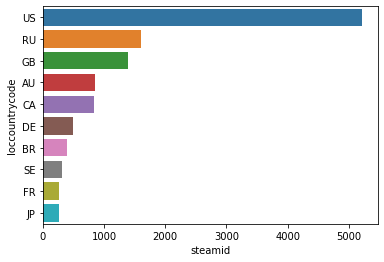

In [0]:
player_data = player_summary[player_summary.steamid.isin(
    data[data.ClusterID==2].steamid
)][['loccountrycode','steamid']].groupby(
    'loccountrycode',as_index=False).count().sort_values('steamid',ascending=False).head(n=10)

sns.barplot('steamid','loccountrycode',data=player_data)

## Correlations

In [0]:
gameplay_apps_ac = gameplay_apps.merge(ac_count,how='inner',on='appid')
gameplay_apps_ac.sort_values('steamid').head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,ach_count,avg_percentage
0,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,5,0.057843
55435,76561197960266039,220,0.0,1.0,2013-05-06 16:00:46,0,1,Half-Life 2,game,9.99,2004-11-16 00:00:00,96.0,0.0,0.0,5566.0,2004.0,33,17.638451
112701,76561197960266039,240,1286.0,9102.0,2013-05-06 16:00:46,0,1,Counter-Strike: Source,game,19.99,2004-11-01 00:00:00,88.0,0.0,1.0,5581.0,2004.0,148,16.973004
188910,76561197960266039,300,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat: Source,game,9.99,2010-07-12 00:00:00,80.0,0.0,1.0,3502.0,2010.0,55,5.954849
219436,76561197960266039,440,6783.0,103398.0,2013-05-06 16:00:46,0,1,Team Fortress 2,game,0.00,2007-10-10 00:00:00,92.0,0.0,1.0,4508.0,2007.0,520,11.994409


In [0]:
gameplay_apps_ac[gameplay_apps_ac.played==1][['playtime_2weeks','playtime_forever','game_age','Price','ach_count','avg_percentage']].corr()
#Interesting

,playtime_2weeks,playtime_forever,game_age,Price,ach_count,avg_percentage
playtime_2weeks,1.000000,0.515559,-0.002962,0.055583,0.167100,-0.010860
playtime_forever,0.515559,1.000000,0.029205,0.018638,0.224847,-0.017267
game_age,-0.002962,0.029205,1.000000,-0.106078,0.004640,0.032652
Price,0.055583,0.018638,-0.106078,1.000000,-0.022668,0.057826
ach_count,0.167100,0.224847,0.004640,-0.022668,1.000000,-0.160080
avg_percentage,-0.010860,-0.017267,0.032652,0.057826,-0.160080,1.000000


In [0]:
gameplay_apps_ac[gameplay_apps_ac.unplayed==1][['playtime_2weeks','playtime_forever','game_age','Price','ach_count','avg_percentage']].corr()
# Nothing Interesting

,playtime_2weeks,playtime_forever,game_age,Price,ach_count,avg_percentage
playtime_2weeks,1.000000,NaN,-0.000388,0.000186,0.000427,-0.000072
playtime_forever,NaN,NaN,NaN,NaN,NaN,NaN
game_age,-0.000388,NaN,1.000000,-0.178151,-0.123656,-0.105241
Price,0.000186,NaN,-0.178151,1.000000,0.246466,0.103094
ach_count,0.000427,NaN,-0.123656,0.246466,1.000000,-0.107767
avg_percentage,-0.000072,NaN,-0.105241,0.103094,-0.107767,1.000000


In [0]:
gameplay_apps_ac[(gameplay_apps_ac.played==1
                  ) & (gameplay_apps_ac.steamid.isin(
                      data[data.ClusterID==1].steamid #Cluster selection
                  ))][['playtime_2weeks','playtime_forever','game_age','Price','ach_count','avg_percentage']].corr()
# Interesting

,playtime_2weeks,playtime_forever,game_age,Price,ach_count,avg_percentage
playtime_2weeks,1.000000,0.433439,-0.008958,0.029732,0.124630,-0.009176
playtime_forever,0.433439,1.000000,0.029004,-0.006278,0.206854,-0.012698
game_age,-0.008958,0.029004,1.000000,-0.117815,0.001034,0.042425
Price,0.029732,-0.006278,-0.117815,1.000000,-0.062209,0.043858
ach_count,0.124630,0.206854,0.001034,-0.062209,1.000000,-0.178323
avg_percentage,-0.009176,-0.012698,0.042425,0.043858,-0.178323,1.000000


In [0]:
gameplay_apps_ac[(gameplay_apps_ac.played==1
                  ) & (gameplay_apps_ac.steamid.isin(
                      data[data.ClusterID==2].steamid #Cluster selection
                  ))][['playtime_2weeks','playtime_forever','game_age','Price','ach_count','avg_percentage']].corr()
# similar

,playtime_2weeks,playtime_forever,game_age,Price,ach_count,avg_percentage
playtime_2weeks,1.000000,0.434275,0.004081,0.017567,0.136282,0.005788
playtime_forever,0.434275,1.000000,0.037611,-0.024889,0.268105,-0.003716
game_age,0.004081,0.037611,1.000000,-0.083097,0.004428,0.032434
Price,0.017567,-0.024889,-0.083097,1.000000,0.036024,0.075159
ach_count,0.136282,0.268105,0.004428,0.036024,1.000000,-0.146544
avg_percentage,0.005788,-0.003716,0.032434,0.075159,-0.146544,1.000000


## Country wise analysis

In [0]:
player_summary = pd.read_csv(player_summary_loc)
player_summary.head()

,steamid,personaname,profileurl,avatar,avatarmedium,avatarfull,personastate,communityvisibilitystate,profilestate,lastlogoff,commentpermission,realname,primaryclanid,timecreated,gameid,gameserverip,gameextrainfo,cityid,loccountrycode,locstatecode,loccityid,dateretrieved
0,76561197960266039,Weasel,http://steamcommunity.com/id/Weasel/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,3,1.0,2013-02-13 23:41:54,2.0,Weasel,1.035828e+17,2003-09-10 23:48:48,NaN,NaN,NaN,NaN,US,NV,NaN,2013-02-28 14:19:00
1,76561197960269360,minnes kort ett,http://steamcommunity.com/id/dibban/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2013-01-24 17:40:08,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:34:05
2,76561197960269424,t8p,http://steamcommunity.com/profiles/76561197960...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-02-14 19:57:02,1.0,NaN,1.035828e+17,2003-09-12 00:09:53,730.0,208.64.201.103:27034,Counter-Strike: Global Offensive,NaN,CA,NaN,NaN,2013-02-28 14:34:05
3,76561197960269425,lone,http://steamcommunity.com/id/waoh/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-03-06 13:01:11,1.0,Casey,1.035828e+17,2003-09-12 00:18:47,570.0,208.78.164.199:27038,Dota 2,NaN,US,OR,3187.0,2013-03-06 16:18:05
4,76561197960269501,â™¥ PanzerKnacker â™¥,http://steamcommunity.com/id/PanzerKnacker/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-03-06 03:13:37,NaN,Justin Glenn,1.035828e+17,2003-09-12 00:23:37,NaN,NaN,NaN,NaN,US,CA,518.0,2013-03-06 16:18:05


In [0]:
gameplay_player = play_counts.merge(player_summary,how='inner',on='steamid')
gameplay_player.head()

,steamid,unplayed,played,no_of_games,unplayed_percentage,personaname,profileurl,avatar,avatarmedium,avatarfull,personastate,communityvisibilitystate,profilestate,lastlogoff,commentpermission,realname,primaryclanid,timecreated,gameid,gameserverip,gameextrainfo,cityid,loccountrycode,locstatecode,loccityid,dateretrieved
0,76561197960266039,7,10,17,0.411765,Weasel,http://steamcommunity.com/id/Weasel/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,3,1.0,2013-02-13 23:41:54,2.0,Weasel,1.035828e+17,2003-09-10 23:48:48,NaN,NaN,NaN,NaN,US,NV,NaN,2013-02-28 14:19:00
1,76561197960269360,19,20,39,0.487179,minnes kort ett,http://steamcommunity.com/id/dibban/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2013-01-24 17:40:08,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:34:05
2,76561197960269424,22,43,65,0.338462,t8p,http://steamcommunity.com/profiles/76561197960...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-02-14 19:57:02,1.0,NaN,1.035828e+17,2003-09-12 00:09:53,730.0,208.64.201.103:27034,Counter-Strike: Global Offensive,NaN,CA,NaN,NaN,2013-02-28 14:34:05
3,76561197960269425,77,145,222,0.346847,lone,http://steamcommunity.com/id/waoh/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-03-06 13:01:11,1.0,Casey,1.035828e+17,2003-09-12 00:18:47,570.0,208.78.164.199:27038,Dota 2,NaN,US,OR,3187.0,2013-03-06 16:18:05
4,76561197960269501,63,143,206,0.305825,â™¥ PanzerKnacker â™¥,http://steamcommunity.com/id/PanzerKnacker/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,1,3,1.0,2013-03-06 03:13:37,NaN,Justin Glenn,1.035828e+17,2003-09-12 00:23:37,NaN,NaN,NaN,NaN,US,CA,518.0,2013-03-06 16:18:05


In [0]:
'''
data = gameplay_player[['loccountrycode','no_of_games']].groupby(
    by='loccountrycode').count().sort_values('no_of_games',ascending=False).reset_index().head()

data.no_of_games = data.no_of_games*100/gameplay_player.count()[1]
data.columns = ['loccountrycode','% of players']
data
'''

"\ndata = gameplay_player[['loccountrycode','no_of_games']].groupby(\n    by='loccountrycode').count().sort_values('no_of_games',ascending=False).reset_index().head()\n\ndata.no_of_games = data.no_of_games*100/gameplay_player.count()[1]\ndata.columns = ['loccountrycode','% of players']\ndata\n"

In [0]:
'''
gameplay_player[gameplay_player.loccountrycode.isin(data.loccountrycode)][['loccountrycode','no_of_games']].groupby(
    by='loccountrycode').agg({'no_of_games':'mean'}).sort_values('no_of_games',ascending=False)
    '''

"\ngameplay_player[gameplay_player.loccountrycode.isin(data.loccountrycode)][['loccountrycode','no_of_games']].groupby(\n    by='loccountrycode').agg({'no_of_games':'mean'}).sort_values('no_of_games',ascending=False)\n    "

In [0]:
'''
gameplay_player[gameplay_player.loccountrycode.isin(data.loccountrycode)][['loccountrycode','unplayed_percentage']].groupby(
    by='loccountrycode').agg({'unplayed_percentage':'mean'}).sort_values('unplayed_percentage',ascending=False)
    '''

"\ngameplay_player[gameplay_player.loccountrycode.isin(data.loccountrycode)][['loccountrycode','unplayed_percentage']].groupby(\n    by='loccountrycode').agg({'unplayed_percentage':'mean'}).sort_values('unplayed_percentage',ascending=False)\n    "

## Online and offline

In [0]:
gameplay_apps.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0


In [0]:
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,2
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,2
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,1
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [0]:
gameplay_apps_filter = gameplay_apps[(gameplay_apps.Is_Multiplayer==1)]
gameplay_apps_cluster = gameplay_apps_filter.merge(data[['steamid','ClusterID']],how='inner',on='steamid')
gameplay_apps_cluster.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,ClusterID
0,76561197960269425,10,0.0,1304.0,2013-05-06 15:59:30,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0,2
1,76561197960269425,20,0.0,0.0,2013-05-06 15:59:30,1,0,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0,2
2,76561197960269425,30,0.0,0.0,2013-05-06 15:59:30,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0,2
3,76561197960269425,40,0.0,0.0,2013-05-06 15:59:30,1,0,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0,2
4,76561197960269425,50,0.0,305.0,2013-05-06 15:59:30,0,1,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,2


In [0]:
year_multiplayer = gameplay_apps_cluster[['year','playtime_forever','ClusterID']].groupby(['year','ClusterID'],as_index=False
                                                 ).agg({'playtime_forever':'sum'})

year_multiplayer.sort_values(['year','ClusterID']).head()

,year,ClusterID,playtime_forever
0,1970.0,1,15620553.0
1,1970.0,2,18889765.0
2,1998.0,1,2524390.0
3,1998.0,2,3978375.0
4,1999.0,1,1428474.0


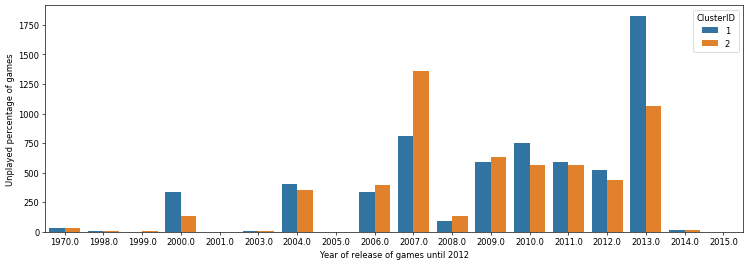

In [0]:
year_multiplayer.playtime_forever = year_multiplayer.playtime_forever/(60*24*365)
figure(num=None, figsize=(15,5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('year','playtime_forever',data=year_multiplayer,hue='ClusterID')
ax.set(xlabel='Year of release of games until 2012')
ax.set(ylabel='Unplayed percentage of games')
plt.show()

In [0]:
gameplay_apps_filter = gameplay_apps
gameplay_apps_cluster = gameplay_apps_filter.merge(data[['steamid','ClusterID']],how='inner',on='steamid')
gameplay_apps_cluster.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age,year,ClusterID
0,76561197960269425,10,0.0,1304.0,2013-05-06 15:59:30,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0,2000.0,2
1,76561197960269425,20,0.0,0.0,2013-05-06 15:59:30,1,0,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0,1999.0,2
2,76561197960269425,30,0.0,0.0,2013-05-06 15:59:30,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0,2003.0,2
3,76561197960269425,40,0.0,0.0,2013-05-06 15:59:30,1,0,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0,2001.0,2
4,76561197960269425,50,0.0,305.0,2013-05-06 15:59:30,0,1,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0,1999.0,2


In [0]:
gameplay_overall = gameplay_apps_cluster[['year','playtime_forever','Is_Multiplayer','ClusterID']].groupby(
    ['year','Is_Multiplayer','ClusterID'],as_index=False).agg(
        {'playtime_forever':'sum'}
    )

gameplay_overall.head()

,year,Is_Multiplayer,ClusterID,playtime_forever
0,1970.0,0.0,1,11373260.0
1,1970.0,0.0,2,14387069.0
2,1970.0,1.0,1,15620553.0
3,1970.0,1.0,2,18889765.0
4,1998.0,1.0,1,2524390.0


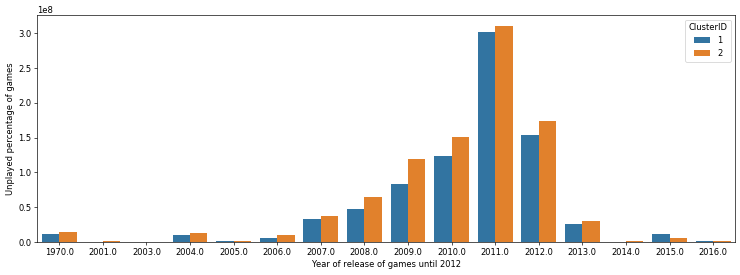

In [0]:
#year_multiplayer.playtime_forever = year_multiplayer.playtime_forever/(60*24*365)
figure(num=None, figsize=(15,5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('year','playtime_forever',data=gameplay_overall[gameplay_overall.Is_Multiplayer==0],hue='ClusterID')
ax.set(xlabel='Year of release of games until 2012')
ax.set(ylabel='Unplayed percentage of games')
plt.show()

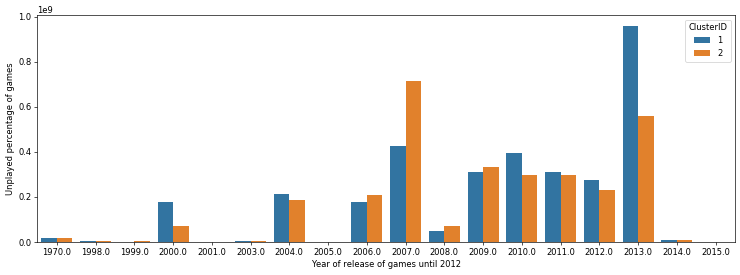

In [0]:
#year_multiplayer.playtime_forever = year_multiplayer.playtime_forever/(60*24*365)
figure(num=None, figsize=(15,5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('year','playtime_forever',data=gameplay_overall[gameplay_overall.Is_Multiplayer==1],hue='ClusterID')
ax.set(xlabel='Year of release of games until 2012')
ax.set(ylabel='Unplayed percentage of games')
plt.show()

### Games in Genres

In [0]:
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,2
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,2
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,1
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [0]:
data.columns.values

array(['steamid', 'commentpermission', 'realname', 'playtime_2weeks',
       'playtime_forever', 'no_of_games', 'free_to_play', 'Price',
       'Rating', 'Required_Age', 'Is_Multiplayer', 'Is_Adult', 'unplayed',
       'game_age', 'no_of_groups', 'avg_friend_duration',
       'avg_percentage_completion', 'total_group_connections',
       'total_friend_connections', 'total_achievements',
       'loggoff_duration', 'account_age', 'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_byg

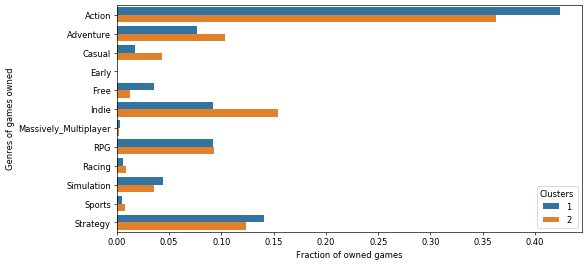

In [0]:
data_melt = data[["ClusterID",'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy']]
data_melt.columns = ["ClusterID",'Action',
       'Adventure', 'Casual', 'Early', 'Free',
       'Indie', 'Massively_Multiplayer', 'RPG',
       'Racing', 'Simulation', 'Sports', 'Strategy']

data_melt = data_melt.melt(id_vars=["ClusterID"], 
        var_name="Genre", 
        value_name="% of games")

data_melt_genre = data_melt.groupby(['ClusterID','Genre'],as_index=False).agg({
    '% of games':'mean'
})

data_melt_genre.columns = ['Clusters','Genre','% of games']

figure(num=None, figsize=(10,5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('% of games','Genre',data=data_melt_genre,hue='Clusters')
ax.set(xlabel='Fraction of owned games')
ax.set(ylabel='Genres of games owned')
plt.show()


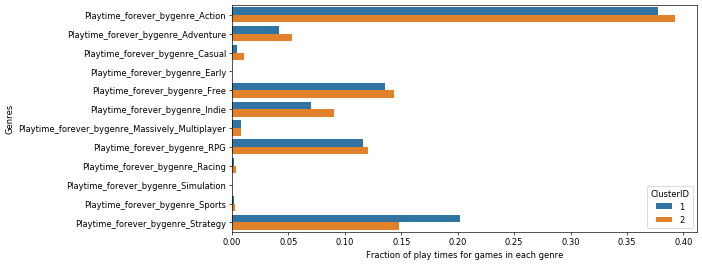

In [0]:
data_melt = data[["ClusterID",'Playtime_forever_bygenre_Action',
       'Playtime_forever_bygenre_Adventure',
       'Playtime_forever_bygenre_Casual',
       'Playtime_forever_bygenre_Early', 'Playtime_forever_bygenre_Free',
       'Playtime_forever_bygenre_Indie',
       'Playtime_forever_bygenre_Massively_Multiplayer',
       'Playtime_forever_bygenre_RPG', 'Playtime_forever_bygenre_Racing',
       'Playtime_forever_bygenre_Simulation',
       'Playtime_forever_bygenre_Sports',
       'Playtime_forever_bygenre_Strategy']].melt(id_vars=["ClusterID"], 
        var_name="Genre", 
        value_name="% of games")

data_melt_genre = data_melt.groupby(['ClusterID','Genre'],as_index=False).agg({
    '% of games':'mean'
})

figure(num=None, figsize=(10,5), dpi=60, facecolor='w', edgecolor='k')
ax = sns.barplot('% of games','Genre',data=data_melt_genre,hue='ClusterID')
ax.set(xlabel='Fraction of play times for games in each genre')
ax.set(ylabel='Genres')
plt.show()

In [0]:
gameplay.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0


### Playtimes online and offline

In [0]:
gameplay_apps.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved,unplayed,played,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,game_age
0,76561197960266039,10,7.0,1311.0,2013-05-06 16:00:46,0,1,Counter-Strike,game,9.99,2000-11-01 00:00:00,88.0,0.0,1.0,7042.0
1,76561197960266039,20,0.0,391.0,2013-05-06 16:00:46,0,1,Team Fortress Classic,game,4.99,1999-04-01 00:00:00,-1.0,0.0,1.0,7622.0
2,76561197960266039,30,0.0,0.0,2013-05-06 16:00:46,1,0,Day of Defeat,game,4.99,2003-05-01 00:00:00,79.0,0.0,1.0,6131.0
3,76561197960266039,40,0.0,748.0,2013-05-06 16:00:46,0,1,Deathmatch Classic,game,4.99,2001-06-01 00:00:00,-1.0,0.0,1.0,6830.0
4,76561197960266039,50,0.0,0.0,2013-05-06 16:00:46,1,0,Half-Life: Opposing Force,game,4.99,1999-11-01 00:00:00,-1.0,0.0,1.0,7408.0


In [0]:
total_play_time = gameplay_apps.groupby('Is_Multiplayer',as_index=False).agg({'playtime_2weeks':'sum',
                                                     'playtime_forever':'sum'})
#gameplay_apps_total = gameplay_apps.merge(total_play_time,on='Is_Multiplayer',how='inner')
#gameplay_apps_total = gameplay_apps_total.groupby(['steamid','Is_Multiplayer'],as_index=False).agg(
#    {'playtime_2weeks_x':'sum','playtime_forever_x':'sum','playtime_2weeks_y':'mean','playtime_forever_y':'mean'}
#)

total_play_time['total_2weeks'] = total_play_time.playtime_2weeks.sum()
total_play_time['total_forever'] = total_play_time.playtime_forever.sum()
total_play_time.head()

,Is_Multiplayer,playtime_2weeks,playtime_forever,total_2weeks,total_forever
0,0.0,2.743495e+08,3.817404e+09,1.626379e+09,2.622219e+10
1,1.0,1.352029e+09,2.240479e+10,1.626379e+09,2.622219e+10


In [0]:
total_play_time['2week'] = total_play_time.playtime_2weeks*100/total_play_time.total_2weeks
total_play_time['foever'] = total_play_time.playtime_forever*100/total_play_time.total_forever
total_play_time

,Is_Multiplayer,playtime_2weeks,playtime_forever,total_2weeks,total_forever,2week,foever
0,0.0,2.743495e+08,3.817404e+09,1.626379e+09,2.622219e+10,16.868735,14.557913
1,1.0,1.352029e+09,2.240479e+10,1.626379e+09,2.622219e+10,83.131265,85.442087


In [0]:
total_play_time = gameplay_apps[(
    gameplay_apps.steamid.isin(data[data.ClusterID==1].steamid)
)].groupby('Is_Multiplayer',as_index=False).agg({'playtime_2weeks':'sum',
                                                     'playtime_forever':'sum'})
total_play_time['total_2weeks'] = total_play_time.playtime_2weeks.sum()
total_play_time['total_forever'] = total_play_time.playtime_forever.sum()
total_play_time['2week'] = total_play_time.playtime_2weeks*100/total_play_time.total_2weeks
total_play_time['foever'] = total_play_time.playtime_forever*100/total_play_time.total_forever
total_play_time

,Is_Multiplayer,playtime_2weeks,playtime_forever,total_2weeks,total_forever,2week,foever
0,0.0,58826036.0,8.087103e+08,254949746.0,4.128581e+09,23.073581,19.588091
1,1.0,196123710.0,3.319871e+09,254949746.0,4.128581e+09,76.926419,80.411909


In [0]:
total_play_time = gameplay_apps[(
    gameplay_apps.steamid.isin(data[data.ClusterID==2].steamid)
)].groupby('Is_Multiplayer',as_index=False).agg({'playtime_2weeks':'sum',
                                                     'playtime_forever':'sum'})
total_play_time['total_2weeks'] = total_play_time.playtime_2weeks.sum()
total_play_time['total_forever'] = total_play_time.playtime_forever.sum()
total_play_time['2week'] = total_play_time.playtime_2weeks*100/total_play_time.total_2weeks
total_play_time['foever'] = total_play_time.playtime_forever*100/total_play_time.total_forever
total_play_time

,Is_Multiplayer,playtime_2weeks,playtime_forever,total_2weeks,total_forever,2week,foever
0,0.0,47516085.0,9.323999e+08,155892157.0,3.940296e+09,30.4801,23.663195
1,1.0,108376072.0,3.007896e+09,155892157.0,3.940296e+09,69.5199,76.336805
